Object Detection

Библиотека ImageAI предоставляет очень удобные и мощные методы для обнаружения объектов на изображениях. Чтобы приступить к обнаружению объектов, необходимо загрузить уже обученные модели обнаружения объектов. Воспользуемся моделью YOLO. 

Установим библиотеки конкретных версий, чтобы все заработало :)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
!pip install -q tensorflow==2.3.1
!pip install -q tensorflow-gpu==2.3.1
!git clone https://github.com/dvolchek/YOLOv3-TensorFlow-2.x.git
%cd YOLOv3-TensorFlow-2.x
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 67.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
xarray-einstats 0.5.1 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
plotnine 0.8.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have num

Не забудьте подгрузить файл изображения в сессионное хранилище. Теперь можно выполнять распознование. Выполняем распознавание объектов для изображения с именем 37.jpg. Изображение с распознанными объектами будет сохранено в файле detected.jpg

**NB: Для детектирования людей на последующих изображениях достаточно изменять имена файлов в следующем блоке и запускать его. Весь код сначала выполнять не нужно**



In [ ]:
import os
os.getcwd()

'/content/YOLOv3-TensorFlow-2.x'

In [ ]:
import detection_demo
detection_demo.detect('../content/0.jpg')

Изображение можно посмотреть в папке проекта, либо вывести на экран в блокноте.

Видно, что на изображении 5 людей. Модель успешно справилась с их обнаружением. Остальные объекты типа laptop, cup и т.п. нас не интересуют)

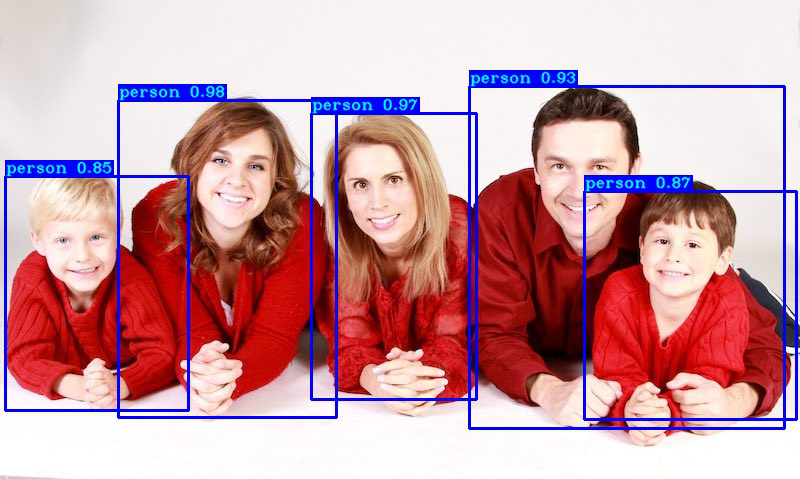

In [ ]:
from PIL import Image
image = Image.open('/content/detected.jpg')
image

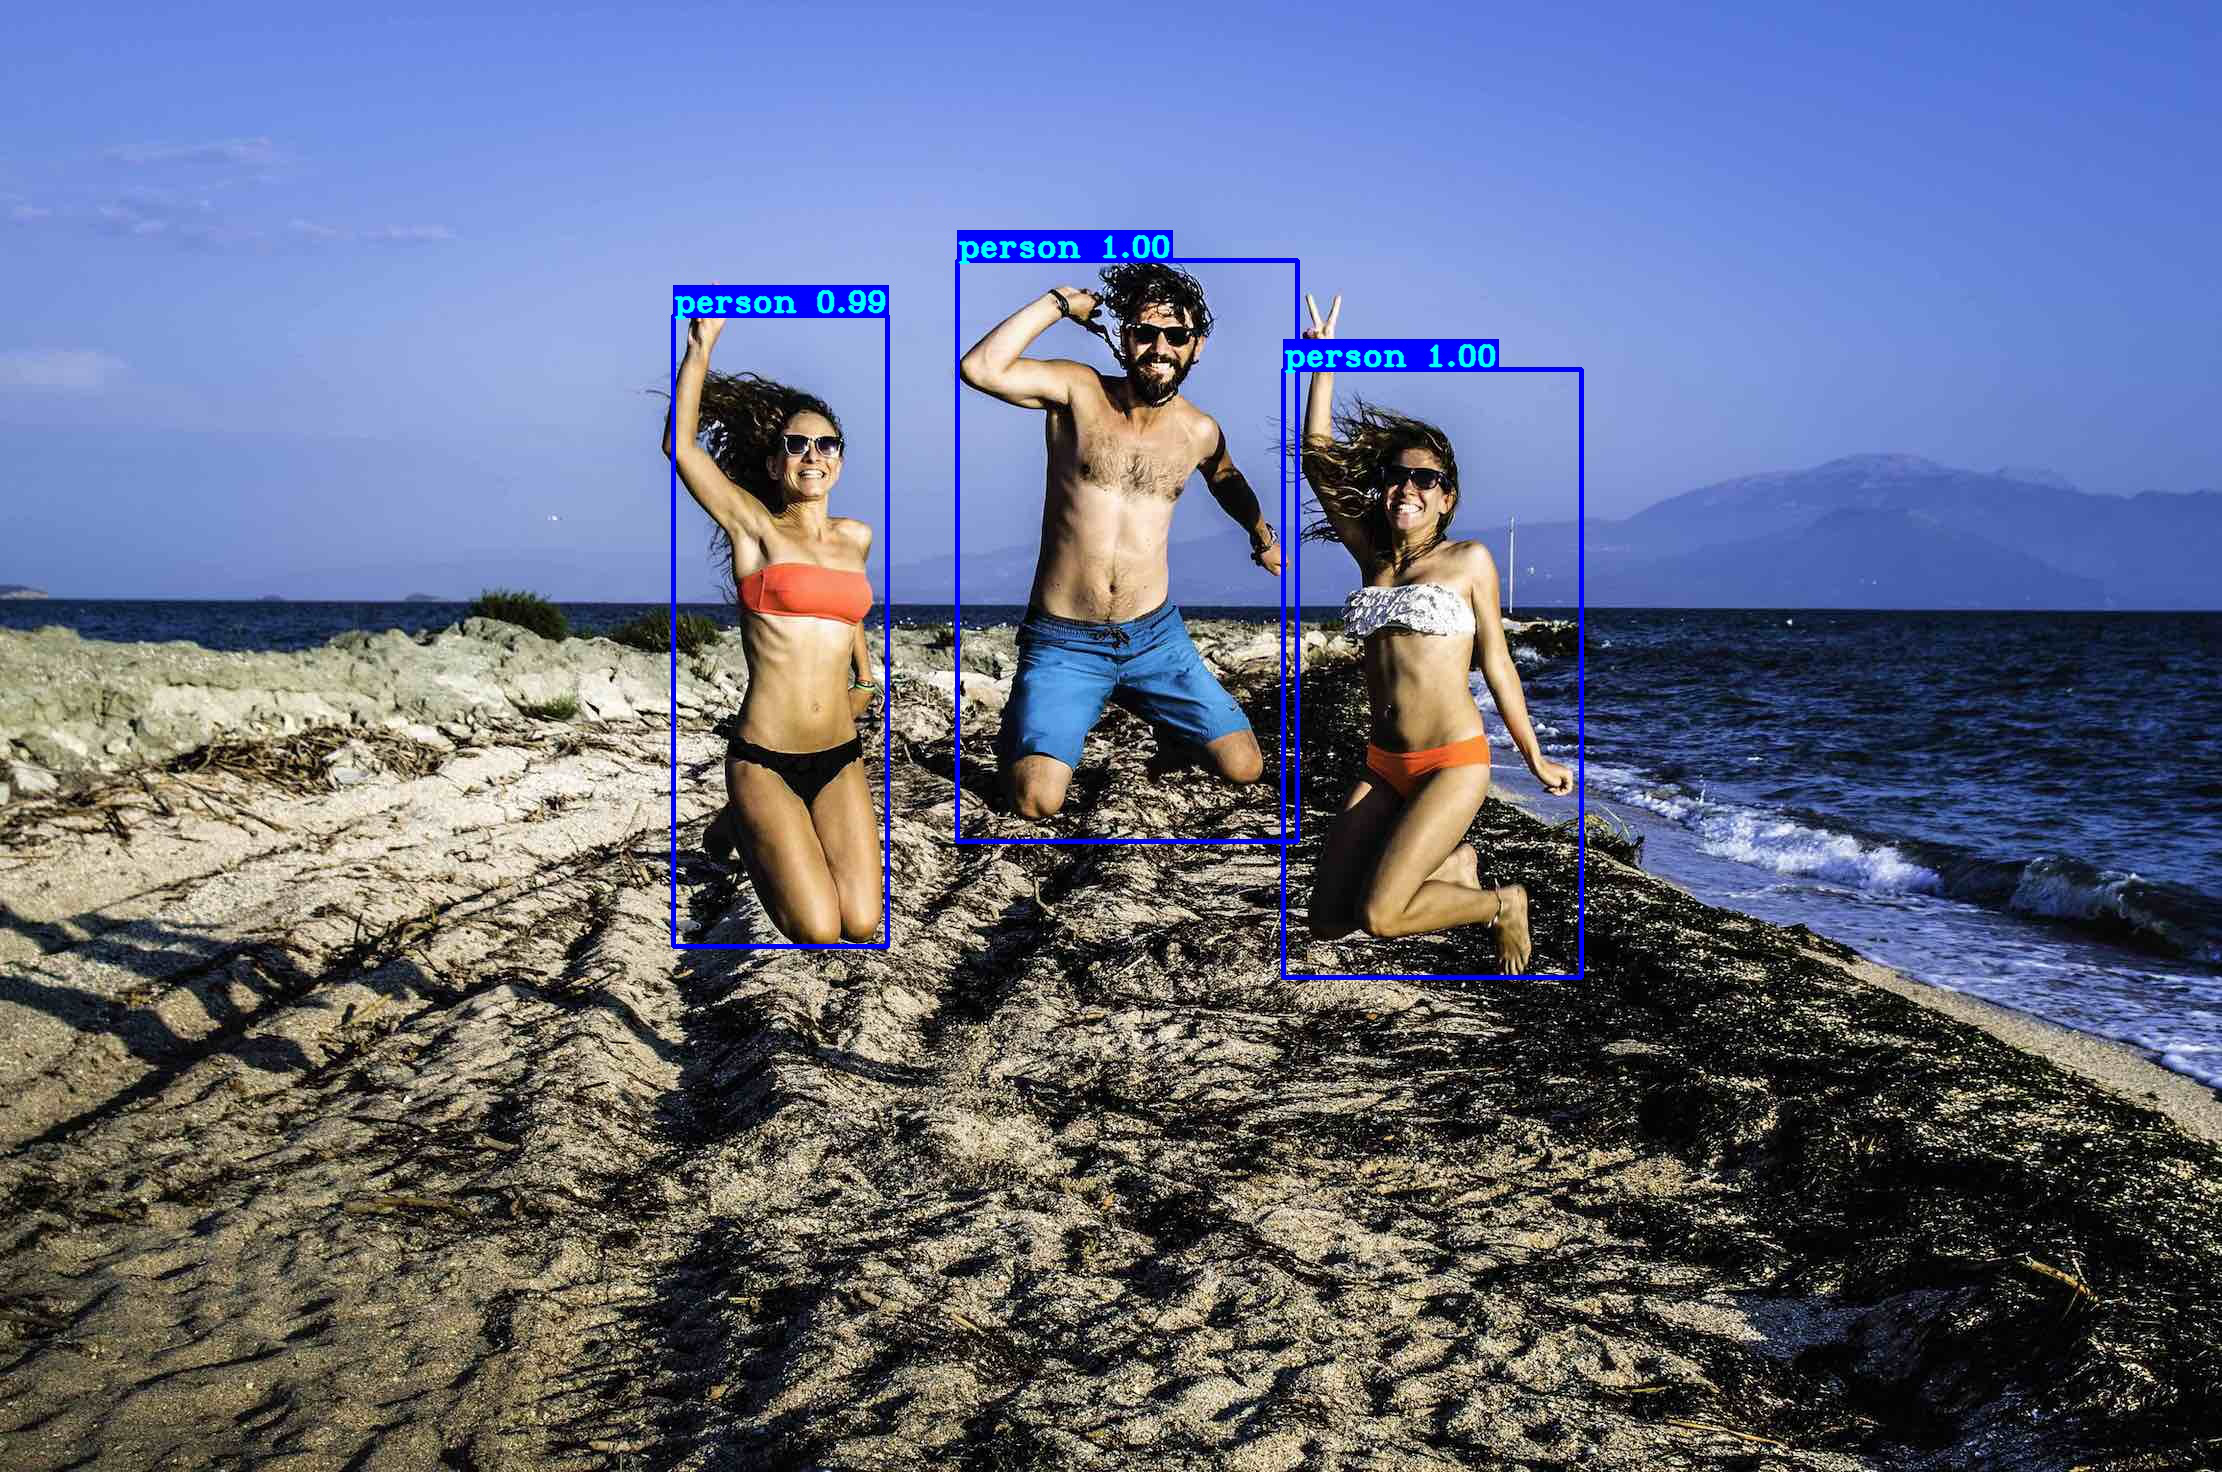

In [20]:
detection_demo.detect('../content/8.jpg')
image = Image.open('/content/detected.jpg')
image

- `0.jpg`: 5 человек, 5 найдено
- `20.jpg`: 4 человека, 3 найдено
- `23.jpg`: 6 человек, 6 найдено
- `24.jpg`: 4 человека, 4 найдено
- `28.jpg`: 5 человек, 3 найдено
- `30.jpg`: 4 человека, 4 найдено
- `31.jpg`: 7 человек, 6 найдено
- `33.jpg`: 4 человека, 4 найдено
- `35.jpg`: 4 человек, 4 найдено
- `8.jpg`: 3 человека, 3 найдено

In [24]:
TP = 5 + 3 + 6 + 4 + 3 + 4 + 6 + 4 + 4 + 3
FN = 1 + 2 + 1
FP = 0
TN = 0

In [26]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
f1

0.9545454545454545